In [10]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [11]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [12]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [13]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.58e-04
iter num 100, norm(Gk)/(1+norm(xk)): 2.12e-04, step-size: 1.83e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.42e-12, step-size: 4.94e-03
iter num 200, norm(Gk)/(1+norm(xk)): 9.43e-13, step-size: 4.94e-03
terminated


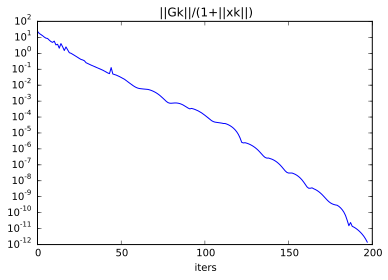

In [14]:
x = apg.solve(quad_grad, soft_thresh, n, use_restart=True, eps=1e-12)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.58e-04
iter num 100, norm(Gk)/(1+norm(xk)): 2.78e-02, step-size: 1.83e-03
iter num 200, norm(Gk)/(1+norm(xk)): 4.58e-04, step-size: 4.94e-03
iter num 300, norm(Gk)/(1+norm(xk)): 2.85e-05, step-size: 3.75e-03
iter num 400, norm(Gk)/(1+norm(xk)): 1.25e-06, step-size: 4.48e-03
iter num 500, norm(Gk)/(1+norm(xk)): 4.70e-08, step-size: 4.64e-03
iter num 600, norm(Gk)/(1+norm(xk)): 1.83e-09, step-size: 3.75e-03
iter num 700, norm(Gk)/(1+norm(xk)): 1.85e-10, step-size: 5.16e-03
iter num 800, norm(Gk)/(1+norm(xk)): 1.02e-11, step-size: 4.56e-03
iter num 859, norm(Gk)/(1+norm(xk)): 9.77e-13, step-size: 4.06e-03
terminated


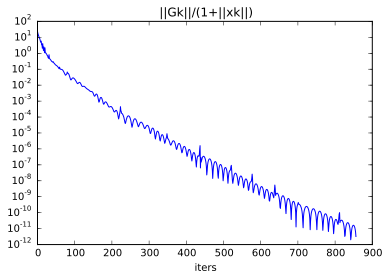

In [15]:
x_no_restart = apg.solve(quad_grad, soft_thresh, n, use_restart=False, eps=1e-12)

Compare to SCS (another first-order solver)

In [16]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A * z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104004
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 2002, constraints m = 2104
Cones:	linear vars: 2000
	soc vars: 104, soc blks: 2
Setup time: 8.25e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  7.07e-03 
   100| 7.91e-03  8.04e-03  1.49e-02  4.24e+01  4.37e+01  2.03e-14  1.99e-01 
   200| 6.05e-03  4.97e-03  1.64e-02  4.02e+01  4.16e+01  2.73e-14  4.00e-01 
   300| 5.90e-03  4.47e-03  1.68e-02  3.84e+01  3.97e+01  3

30.804356231478

Relative error:

In [17]:
print(np.linalg.norm(x - z.value.A1) / np.linalg.norm(x))

0.0489138772326


Print outputs

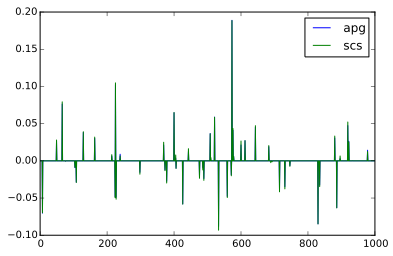

In [18]:
plt.plot(x, label='apg')
plt.plot(z.value.A1, label='scs')
plt.legend()